## COVID DETECTION USING CHEST X-RAYS

Work By:


1.   Priyanshu(19BAI1077)
2.   Smrithi(19BAI1088)

**Importing necessary libraries**

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import tensorflow as tf
import cv2, os, gc, glob
from tqdm import tqdm
import random

from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.layers import Activation, Dropout, BatchNormalization, Flatten, Dense
from tensorflow.keras.optimizers import *
from tensorflow.keras.utils import *

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

**Checking working directories**

In [ ]:
import os
os.getcwd()

'C:\\Users\\HP\\AppData\\Local\\Programs\\Python\\Python39\\Scripts'

In [ ]:
os.listdir('C:\\Users\\HP\\AppData\\Local\\Programs\\Python\\Python39\\Scripts\\AI')

['pro']

In [ ]:
os.listdir('C:\\Users\\HP\\AppData\\Local\\Programs\\Python\\Python39\\Scripts\\AI\\pro')

['COVID',
 'COVID.metadata.xlsx',
 'Lung_Opacity',
 'Lung_Opacity.metadata.xlsx',
 'Normal',
 'Normal.metadata.xlsx',
 'README.md.txt',
 'Viral Pneumonia',
 'Viral Pneumonia.metadata.xlsx']

<H2>DATA PREPROCESSING</H2>

**PNG files preferential selection**

In [ ]:
# Image paths

imagePaths = []
for dirname, _, filenames in os.walk('C:\\Users\\HP\\AppData\\Local\\Programs\\Python\\Python39\\Scripts\\AI'):
    for filename in filenames:
        if (filename[-3:] == 'png'):
            imagePaths.append(os.path.join(dirname, filename))

In [ ]:
# Shuffle the path
random.shuffle(imagePaths)

**Data labelling and storing**

In [ ]:
# Data - Label

Data = []
Target = []
resize = 150

cat = {'Viral Pneumonia': 'Pneumonia', 'Normal': 'Normal', 'COVID': 'Covid-19',
       'Lung_Opacity': 'Lung Opacity'}

i = 0
for imagePath in tqdm(imagePaths):
    label = imagePath.split(os.path.sep)[-2]
    image = cv2.imread(imagePath)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (resize, resize)) /255

    Data.append(image)
    Target.append(cat[label])
    i += 1
    
    # Taking only 3000 images
    if(i == 3000):
        break
print(len(Data))

 14%|██████████▉                                                                  | 2999/21165 [00:49<05:02, 60.06it/s]

3000


c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


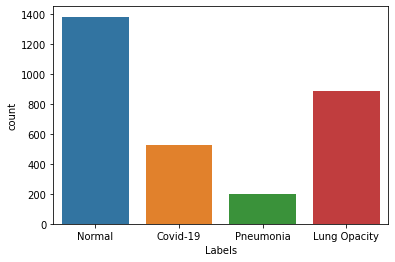

Normal: 1383
Lung Opacity: 887
Pneumonia:  202
Covid-19: 528


In [ ]:
# Count by Label

df = pd.DataFrame(Target,columns=['Labels'])
sns.countplot(df['Labels'])
plt.show()

print('Normal:',Target.count('Normal'))
print('Lung Opacity:',Target.count('Lung Opacity'))
print('Pneumonia: ',Target.count('Pneumonia'))
print('Covid-19:',Target.count('Covid-19'))

**Shaping Images**

In [ ]:
# Images shape

size = []
for file in imagePaths: 
    image = plt.imread(file)
    size.append(image.shape)
pd.Series(size).value_counts()

(299, 299)       21025
(299, 299, 3)      140
dtype: int64

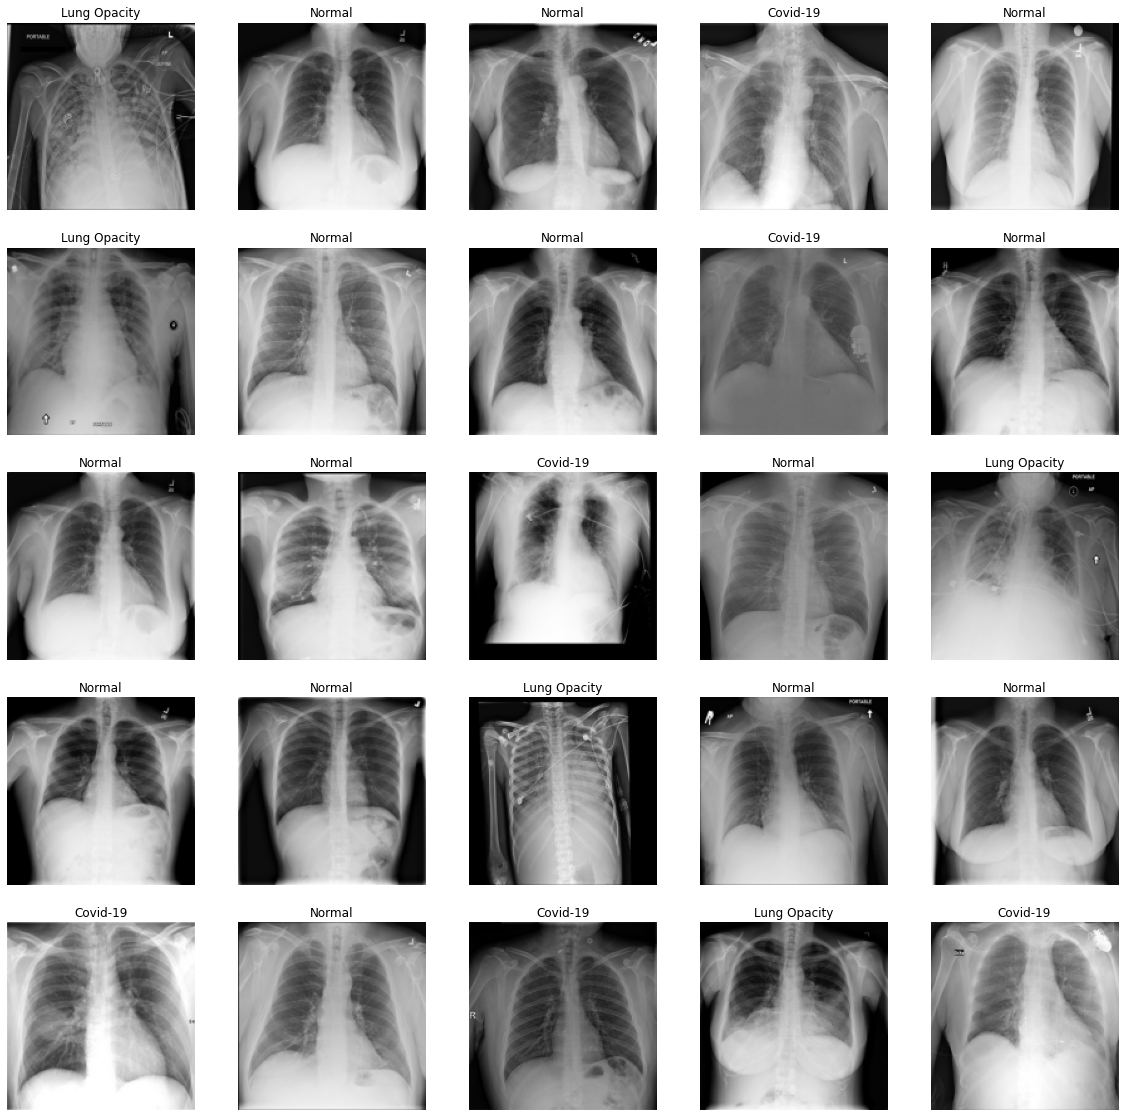

In [ ]:
# Show Images

plt.figure(figsize=(20,20))
# for n , i in enumerate(list(np.random.randint(0,len(imagePaths),25))) : 
for n , i in enumerate(list(np.random.randint(0,3000,25))) : 
    plt.subplot(5,5,n+1)
    plt.imshow(Data[i] , cmap='gray')
    plt.title(Target[i])
    plt.axis('off')     
plt.show()

**Integer Encoding**

In [ ]:
# encode labels as integers
import tensorflow.keras.utils
from tensorflow.keras import utils as np_utils
from tensorflow.keras.utils import to_categorical
le = LabelEncoder()
labels = le.fit_transform(Target)
labels = to_categorical(labels)

print(le.classes_)
print(labels[2])

['Covid-19' 'Lung Opacity' 'Normal' 'Pneumonia']
[0. 0. 1. 0.]


**Train-test split**

Trainng data ratio to testing data is 80:20

In [ ]:
# split Data

(x_train, x_test, y_train, y_test) = train_test_split(Data, labels,test_size=0.20,
                                                      stratify=labels,random_state=42)

trainX = np.array(x_train)
testX = np.array(x_test)
trainY = np.array(y_train)
testY = np.array(y_test)

print(trainX.shape)
print(testX.shape)
print(trainY.shape)
print(testY.shape)

(2400, 150, 150, 3)
(600, 150, 150, 3)
(2400, 4)
(600, 4)


In [ ]:
testY[0]

array([0., 0., 1., 0.], dtype=float32)

In [ ]:
s = 150 # size

**Model Desgin with activation function as**
<h1> ReLU</h1>

11 layers in total
Model design beigins with a combination of OConvo2D and MaxPool2D layers followed by a dropout layer.
Then comes a fully connected layer(Flatten), followed by dense dropout combination.


In [ ]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size =(3,3), activation = "relu", input_shape=(s,s,3), kernel_initializer='he_normal',))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Conv2D(filters = 64, kernel_size =(3,3), activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Conv2D(filters = 128, kernel_size =(3,3), activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2), strides = (1,1)))

model.add(Dropout(0.25))

#fully connected
model.add(Flatten())
model.add(Dense(64, activation = "relu"))
model.add(Dropout(0.2))
# model.add(Dense(3, activation = "softmax"))
# we have 4 classes
model.add(Dense(4, activation = "softmax"))

In [ ]:
# Compile 
model.compile(optimizer= "adam", loss= tensorflow.keras.losses.categorical_crossentropy, metrics=["accuracy"])

In [ ]:
# Model Details

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 33, 33, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 33, 33, 128)       0

In [ ]:
epochs = 30

ThisModel = model.fit(trainX, trainY, epochs=epochs, batch_size=40, verbose=1)

Epoch 1/30
60/60 [==============================] - 112s 2s/step - loss: 1.4614 - accuracy: 0.5629
Epoch 2/30
60/60 [==============================] - 105s 2s/step - loss: 0.7255 - accuracy: 0.7033
Epoch 3/30
60/60 [==============================] - 110s 2s/step - loss: 0.6119 - accuracy: 0.7563
Epoch 4/30
60/60 [==============================] - 108s 2s/step - loss: 0.5332 - accuracy: 0.7929
Epoch 5/30
60/60 [==============================] - 117s 2s/step - loss: 0.4725 - accuracy: 0.8163
Epoch 6/30
60/60 [==============================] - 118s 2s/step - loss: 0.4098 - accuracy: 0.8317
Epoch 7/30
60/60 [==============================] - 112s 2s/step - loss: 0.3732 - accuracy: 0.8512
Epoch 8/30
60/60 [==============================] - 106s 2s/step - loss: 0.3470 - accuracy: 0.8717
Epoch 9/30
60/60 [==============================] - 107s 2s/step - loss: 0.2722 - accuracy: 0.8933
Epoch 10/30
60/60 [==============================] - 107s 2s/step - loss: 0.2238 - accuracy: 0.9167
Epoch 11/

**Model Evaluation**

In [ ]:
modelLoss, modelAccuracy = model.evaluate(testX, testY, verbose=0)

print('Test Loss is {}'.format(modelLoss))
print('Test Accuracy is {}'.format(modelAccuracy ))

Test Loss is 1.578885555267334
Test Accuracy is 0.7900000214576721


In [ ]:
class_names = ['COVID','Lung Opacity','Normal','Pneumonia']

y_pred = model.predict(testX)
print(class_names[np.argmax(y_pred[102])])

COVID


In [ ]:
# classification report on train
batch_size=40

predIdxs = model.predict (trainX, batch_size=batch_size)
predIdxs = np.argmax(predIdxs, axis=1)
print(classification_report(trainY.argmax(axis=1), predIdxs, target_names=le.classes_, digits = 5))

              precision    recall  f1-score   support

    Covid-19    1.00000   1.00000   1.00000       422
Lung Opacity    1.00000   0.99859   0.99930       710
      Normal    0.99819   1.00000   0.99910      1106
   Pneumonia    1.00000   0.99383   0.99690       162

    accuracy                        0.99917      2400
   macro avg    0.99955   0.99810   0.99882      2400
weighted avg    0.99917   0.99917   0.99917      2400



In [ ]:
# classification report on test

predIdxs = model.predict(testX, batch_size=batch_size)
predIdxs = np.argmax(predIdxs, axis=1)
print(classification_report(testY.argmax(axis=1), predIdxs, target_names=le.classes_, digits = 5))

              precision    recall  f1-score   support

    Covid-19    0.78431   0.75472   0.76923       106
Lung Opacity    0.74390   0.68927   0.71554       177
      Normal    0.79863   0.84477   0.82105       277
   Pneumonia    0.92683   0.95000   0.93827        40

    accuracy                        0.79000       600
   macro avg    0.81342   0.80969   0.81102       600
weighted avg    0.78851   0.79000   0.78859       600



**Model Testing on Random Images**

In [ ]:
import tensorflow
# get sample image to test.
imgt ='C:\\Users\\HP\\AppData\\Local\\Programs\\Python\\Python39\\Scripts\\AI\pro\\Lung_Opacity\\Lung_Opacity-4.png'

In [ ]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import preprocess_input

model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])



In [ ]:
img = tensorflow.keras.preprocessing.image.load_img(
    imgt, target_size=(150, 150)
)
img_array = tensorflow.keras.preprocessing.image.img_to_array(img)/255
#print(img_array)
img_array = tf.expand_dims(img_array, axis=0) 

predictions = model.predict(img_array)
print(predictions)

[[4.1743051e-06 9.9999583e-01 3.0584457e-10 8.8867469e-10]]


Text(0.5, 1.0, 'Predicted  : Lung Opacity')

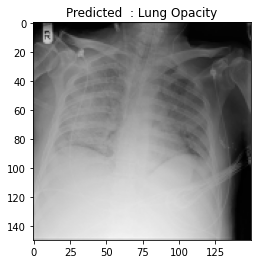

In [ ]:
class_names = ['COVID','Lung Opacity','Normal','Pneumonia']

y_pred = model.predict(img_array)
r=class_names[np.argmax(y_pred)]
plt.figure()
plt.imshow(img)
plt.title('Predicted  : {}'.format(r))


**Model Desgin with activation function as**
<h1> Sigmoid</h1>

11 layers in total
Model design beigins with a combination of OConvo2D and MaxPool2D layers followed by a dropout layer.
Then comes a fully connected layer(Flatten), followed by dense dropout combination.

In [ ]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size =(3,3), activation = "sigmoid", input_shape=(s,s,3), kernel_initializer='he_normal',))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Conv2D(filters = 64, kernel_size =(3,3), activation = "sigmoid"))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Conv2D(filters = 128, kernel_size =(3,3), activation = "sigmoid"))
model.add(MaxPool2D(pool_size = (2,2), strides = (1,1)))

model.add(Dropout(0.25))

#fully connected
model.add(Flatten())
model.add(Dense(64, activation = "sigmoid"))
model.add(Dropout(0.2))
# model.add(Dense(3, activation = "softmax"))
# we have 4 classes
model.add(Dense(4, activation = "softmax"))

In [ ]:
# Compile 
model.compile(optimizer= "adam", loss= tensorflow.keras.losses.categorical_crossentropy, metrics=["accuracy"])

In [ ]:
# Model Details

print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 33, 33, 128)       0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 33, 33, 128)      

In [ ]:
epochs = 15


ThisModel2 = model.fit(trainX, trainY, epochs=epochs, batch_size=40, verbose=1)

Epoch 1/15
60/60 [==============================] - 91s 1s/step - loss: 1.8261 - accuracy: 0.4625
Epoch 2/15
60/60 [==============================] - 84s 1s/step - loss: 1.3040 - accuracy: 0.4313
Epoch 3/15
60/60 [==============================] - 83s 1s/step - loss: 1.2306 - accuracy: 0.4375
Epoch 4/15
60/60 [==============================] - 84s 1s/step - loss: 1.2351 - accuracy: 0.4408
Epoch 5/15
60/60 [==============================] - 85s 1s/step - loss: 1.2371 - accuracy: 0.4496
Epoch 6/15
60/60 [==============================] - 104s 2s/step - loss: 1.2276 - accuracy: 0.4471
Epoch 7/15
60/60 [==============================] - 116s 2s/step - loss: 1.2181 - accuracy: 0.4525
Epoch 8/15
60/60 [==============================] - 116s 2s/step - loss: 1.2280 - accuracy: 0.4396
Epoch 9/15
60/60 [==============================] - 115s 2s/step - loss: 1.2180 - accuracy: 0.4517
Epoch 10/15
60/60 [==============================] - 117s 2s/step - loss: 1.2152 - accuracy: 0.4583
Epoch 11/15
60

**Model Evaluation**

In [ ]:
modelLoss, modelAccuracy = model.evaluate(testX, testY, verbose=0)

print('Test Loss is {}'.format(modelLoss))
print('Test Accuracy is {}'.format(modelAccuracy ))

Test Loss is 1.1940574645996094
Test Accuracy is 0.4716666638851166


In [ ]:
# classification report on train
batch_size=40

predIdxs = model.predict (trainX, batch_size=batch_size)
predIdxs = np.argmax(predIdxs, axis=1)
print(classification_report(trainY.argmax(axis=1), predIdxs, target_names=le.classes_, digits = 5))

              precision    recall  f1-score   support

    Covid-19    0.00000   0.00000   0.00000       426
Lung Opacity    0.00000   0.00000   0.00000       693
      Normal    0.47208   1.00000   0.64138      1133
   Pneumonia    0.00000   0.00000   0.00000       148

    accuracy                        0.47208      2400
   macro avg    0.11802   0.25000   0.16035      2400
weighted avg    0.22286   0.47208   0.30279      2400



c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

In [ ]:
# classification report on test

predIdxs = model.predict(testX, batch_size=batch_size)
predIdxs = np.argmax(predIdxs, axis=1)
print(classification_report(testY.argmax(axis=1), predIdxs, target_names=le.classes_, digits = 5))

              precision    recall  f1-score   support

    Covid-19    0.00000   0.00000   0.00000       107
Lung Opacity    0.00000   0.00000   0.00000       173
      Normal    0.47167   1.00000   0.64100       283
   Pneumonia    0.00000   0.00000   0.00000        37

    accuracy                        0.47167       600
   macro avg    0.11792   0.25000   0.16025       600
weighted avg    0.22247   0.47167   0.30234       600



c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

**Model Testing on Random Images**

[[0.17523488 0.2652676  0.49873653 0.0607609 ]]


Text(0.5, 1.0, 'Predicted  : Normal')

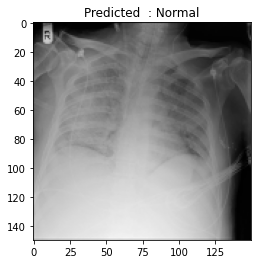

In [ ]:
import tensorflow
# get sample image to test.
imgt ='C:\\Users\\HP\\AppData\\Local\\Programs\\Python\\Python39\\Scripts\\AI\pro\\Lung_Opacity\\Lung_Opacity-4.png'
img = tensorflow.keras.preprocessing.image.load_img(
    imgt, target_size=(150, 150)
)
img_array = tensorflow.keras.preprocessing.image.img_to_array(img)/255
#print(img_array)
img_array = tf.expand_dims(img_array, axis=0) 

predictions = model.predict(img_array)
print(predictions)
class_names = ['COVID','Lung Opacity','Normal','Pneumonia']

y_pred = model.predict(img_array)
r=class_names[np.argmax(y_pred)]
plt.figure()
plt.imshow(img)
plt.title('Predicted  : {}'.format(r))

**Incorrect**

The Predicted value(Normal) is differnet from the actual value(Lung Opacity) due to low accuracy rate of 47% unlike the relu function.
Hence the model is not apt for prediction use.

**Theoretical Reason:** The gradient for the sigmoid function will saturate and when using the chain rule, it will shrink as we go from layer to layer whereas in comparison the gradient for ReLU is always between 0 and 1 and never practically vanishes. 

**Model Desgin with activation function as**
<h1> Linear</h1>

11 layers in total
Model design beigins with a combination of OConvo2D and MaxPool2D layers followed by a dropout layer.
Then comes a fully connected layer(Flatten), followed by dense dropout combination.

In [ ]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size =(3,3), activation = "linear", input_shape=(s,s,3), kernel_initializer='he_normal',))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Conv2D(filters = 64, kernel_size =(3,3), activation = "linear"))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Conv2D(filters = 128, kernel_size =(3,3), activation = "linear"))
model.add(MaxPool2D(pool_size = (2,2), strides = (1,1)))
model.add(Dropout(0.25))

#fully connected
model.add(Flatten())
model.add(Dense(64, activation = "linear"))
model.add(Dropout(0.2))
# model.add(Dense(3, activation = "softmax"))
# we have 4 classes
model.add(Dense(4, activation = "softmax"))

In [ ]:
# Compile 
model.compile(optimizer= "adam", loss= tensorflow.keras.losses.categorical_crossentropy, metrics=["accuracy"])

In [ ]:
epochs = 15


ThisModel3 = model.fit(trainX, trainY, epochs=epochs, batch_size=40, verbose=1)

Epoch 1/15
60/60 [==============================] - 113s 2s/step - loss: 25.8106 - accuracy: 0.5196
Epoch 2/15
60/60 [==============================] - 106s 2s/step - loss: 0.8454 - accuracy: 0.7075
Epoch 3/15
60/60 [==============================] - 108s 2s/step - loss: 0.5556 - accuracy: 0.7804
Epoch 4/15
60/60 [==============================] - 107s 2s/step - loss: 0.4807 - accuracy: 0.8100
Epoch 5/15
60/60 [==============================] - 107s 2s/step - loss: 0.4022 - accuracy: 0.8450
Epoch 6/15
60/60 [==============================] - 107s 2s/step - loss: 0.3406 - accuracy: 0.8725
Epoch 7/15
60/60 [==============================] - 107s 2s/step - loss: 0.3077 - accuracy: 0.8858
Epoch 8/15
60/60 [==============================] - 107s 2s/step - loss: 0.2363 - accuracy: 0.9137
Epoch 9/15
60/60 [==============================] - 107s 2s/step - loss: 0.2042 - accuracy: 0.9333
Epoch 10/15
60/60 [==============================] - 107s 2s/step - loss: 0.1856 - accuracy: 0.9488
Epoch 11

**Model Evaluation**

In [ ]:
modelLoss, modelAccuracy = model.evaluate(testX, testY, verbose=0)

print('Test Loss is {}'.format(modelLoss))
print('Test Accuracy is {}'.format(modelAccuracy ))

Test Loss is 0.6262280941009521
Test Accuracy is 0.8033333420753479


In [ ]:
# classification report on train
batch_size=40

predIdxs = model.predict (trainX, batch_size=batch_size)
predIdxs = np.argmax(predIdxs, axis=1)
print(classification_report(trainY.argmax(axis=1), predIdxs, target_names=le.classes_, digits = 5))

              precision    recall  f1-score   support

    Covid-19    0.99533   1.00000   0.99766       426
Lung Opacity    0.99140   0.99856   0.99497       693
      Normal    1.00000   0.99382   0.99690      1133
   Pneumonia    1.00000   1.00000   1.00000       148

    accuracy                        0.99667      2400
   macro avg    0.99668   0.99809   0.99738      2400
weighted avg    0.99669   0.99667   0.99667      2400



In [ ]:
# classification report on test

predIdxs = model.predict(testX, batch_size=batch_size)
predIdxs = np.argmax(predIdxs, axis=1)
print(classification_report(testY.argmax(axis=1), predIdxs, target_names=le.classes_, digits = 5))

              precision    recall  f1-score   support

    Covid-19    0.82558   0.66355   0.73575       107
Lung Opacity    0.72727   0.78613   0.75556       173
      Normal    0.82712   0.86219   0.84429       283
   Pneumonia    0.96875   0.83784   0.89855        37

    accuracy                        0.80333       600
   macro avg    0.83718   0.78743   0.80854       600
weighted avg    0.80679   0.80333   0.80270       600



**Testing on random images**

[[1.0459543e-01 8.9382493e-01 2.4058702e-04 1.3390231e-03]]


Text(0.5, 1.0, 'Predicted  : Lung Opacity')

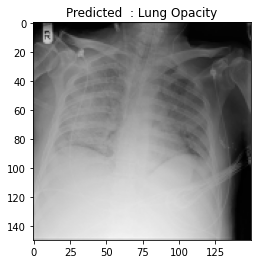

In [ ]:
import tensorflow
# get sample image to test.
imgt ='C:\\Users\\HP\\AppData\\Local\\Programs\\Python\\Python39\\Scripts\\AI\pro\\Lung_Opacity\\Lung_Opacity-4.png'
img = tensorflow.keras.preprocessing.image.load_img(
    imgt, target_size=(150, 150)
)
img_array = tensorflow.keras.preprocessing.image.img_to_array(img)/255
#print(img_array)
img_array = tf.expand_dims(img_array, axis=0) 

predictions = model.predict(img_array)
print(predictions)
class_names = ['COVID','Lung Opacity','Normal','Pneumonia']

y_pred = model.predict(img_array)
r=class_names[np.argmax(y_pred)]
plt.figure()
plt.imshow(img)
plt.title('Predicted  : {}'.format(r))

**ACCURATE RESULTS**
This model yielded an accuracy score of 81%(highest so far) and also made us reach the correct result. Hence, this is a suitable model for our concept.